# Presentation version

In [1]:
import os, sys
import pandas as pd
import numpy as np

"""
Preprocessing the data

"""

DATA_DIR = "../data/"
RAW_DATA_FILE = DATA_DIR + "data.csv"

# Check if data dir or file exist
if not os.path.exists(DATA_DIR) \
    or not os.path.exists(RAW_DATA_FILE):
    print(
        "CANNOT find {} or {}".format(DATA_DIR, RAW_DATA_FILE),
        file=sys.stderr
    )
    sys.exit()

# Load csv data
raw_data = pd.read_csv(RAW_DATA_FILE)

# Columns that we think useful
COLS = [
            "property_id",
            "transaction_amount",
            "loan_amount",
            "lender",
            "transaction_date",
            "property_type",
            "year_built",
            "sqft",
            "property_address"
        ]

data = raw_data[COLS]

print(
    "\n=======================\n"
    "    DATA Overview\n"
    "=======================\n"
    "Size of Data: {:d}\n"
    "Zero Transction Amount {:d}\n"
    "Zero Loan Amount {:d}\n"
    "Num. of Lenders:{:d}, \n\t Num. of \"* Undisclosed\" {:d}\n"
    "Num. of property_type {:d}\n"
    .format(
        data.shape[0],
        data.transaction_amount.value_counts()[0],
        data.loan_amount.value_counts()[0],
        data.lender.nunique(),
        data.lender.value_counts()['* Undisclosed'],
        data.property_type.nunique()
    )
)

"""
Now draw plot to look at different distribution of data. Using NumPy and Matplotlib.
    Transaction amount: ta
    Loan amount: la
    Lender: ld (might have long tail)
    Transaction date: td
    Property type: pt
    Year built: yb
    Square foot: sf
    Property Address: pa
"""





    DATA Overview
Size of Data: 158800
Zero Transction Amount 471
Zero Loan Amount 109618
Num. of Lenders:10074, 
	 Num. of "* Undisclosed" 110687
Num. of property_type 12



'\nNow draw plot to look at different distribution of data. Using NumPy and Matplotlib.\n    Transaction amount: ta\n    Loan amount: la\n    Lender: ld (might have long tail)\n    Transaction date: td\n    Property type: pt\n    Year built: yb\n    Square foot: sf\n    Property Address: pa\n'

## Address

In [2]:
np_pa = data.as_matrix(columns=['property_address'])\
            .transpose()


## Transaction Amount

In [3]:
# Transaction amount:
np_ta = data.as_matrix(columns=["transaction_amount"])\
            .transpose()

ta_min, ta_max = np.amin(np_ta), np.amax(np_ta)
ta_max, ta_min

(231000000, 0)

In [4]:
hist_ta, edge_ta = np.histogram(np_ta, bins=[x for x in range(ta_min, ta_max + 1000000, 1000000)])
print(hist_ta)
print(edge_ta)
len(hist_ta)

print(sum(hist_ta[:11]) / sum(hist_ta))
print(sum(hist_ta[:21]) / sum(hist_ta))

[150568   5919   1131    385    225    116     90     86     43     33
     33      9     22      9     22     11     12      4      8      1
      8      3      4      0      3      5      0      0      4      0
      1      0      7      2      0      3      3      1      1      0
      0      0      0      2      2      0      4      0      0      0
      0      0      0      0      0      0      3      0      0      0
      0      0      4      0      0      3      0      0      3      0
      0      0      1      0      0      0      0      0      0      0
      0      0      1      0      0      0      0      0      0      0
      1      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      1      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

## Filtering Constraints:
1. transaction amount < 1,300,000

## Loan amount

In [5]:
np_la = data.as_matrix(columns=['loan_amount'])\
            .transpose()

In [6]:
la_min, la_max = np.amin(np_la), np.amax(np_la)
print(la_min, la_max)

0.0 46499900.0


In [7]:
hist_la, edge_la = np.histogram(np_la, bins=[x for x in range(int(la_min), int(la_max), 100000)])
print(hist_la)
print(edge_la)

print("\nCount of non-zero entries:")
print(np.count_nonzero(np_la))

print("\nProportion of non-zero terms in loan amount")
print(np.count_nonzero(np_la) / np_la.shape[1])

[114238  12164  11495   7549   5297   2480   1656    889    702    467
    423    231    179    149    104    122     65     70     53     39
     60     36     27     19     25     30     15     15      8     10
     24      7     11      8      2     14      6      4      8      2
      6      3      6      4      3      4      4      2      4      0
     13      1      2      0      0      2      4      0      1      1
      2      1      0      1      0      0      2      0      0      0
      0      0      0      0      0      1      0      1      2      0
      2      0      0      1      0      1      0      0      0      0
      1      0      0      1      0      2      0      0      0      0
     10      0      2      0      0      1      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      1      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

## Lender

In [8]:
np_ld = data.as_matrix(columns=['lender'])\
            .transpose()
print("lenders in total", np_ld.size)
print("unique lenders", np.unique(np_ld).size)

values,counts = np.unique(np_ld,return_counts=True)
ind=np.argmax(counts)
print("Most Common", values[ind])
print("Count of that", counts[ind])


lenders in total 158800
unique lenders 10074
Most Common * Undisclosed
Count of that 110687


## Transaction Date

In [9]:
np_td = data.as_matrix(columns=['transaction_date'])\
            .transpose()
np_td.sort()
np_td
print(np_td[0])

from datetime import datetime
for td in np_td[0]:
    dt_object = datetime.strptime(td, "%Y-%m-%d")
    # print(dt_object.isoweekday())
    # In iso weekday, 1 is Monday, 7 is Sunday

['2012-01-03' '2012-01-03' '2012-01-03' ..., '2017-12-05' '2017-12-05'
 '2017-12-07']


## Property Type

In [10]:
np_pt = data.as_matrix(columns=['property_type'])\
            .transpose()
pt_values, pt_counts = np.unique(np_pt, return_counts=True)
print(pt_values)
print(pt_counts)
print("Sum:", sum(pt_counts))

['RAPT' 'RCON' 'RCOO' 'RDUP' 'RMFD' 'RMOB' 'RMSC' 'RQUA' 'RSFR' 'RTIM'
 'RTRI' 'VRES']
[  1626  17255     33   3875   1482   2063   1452   1020 124417     15
    887   4675]
Sum: 158800


## Year built

In [11]:
np_yb = data.as_matrix(columns=['year_built'])\
            .transpose()
print(np.amin(np_yb), np.amax(np_yb))
print("Non-zero built year", np.count_nonzero(np_yb))
print("Zero built year", np_yb.size - np.count_nonzero(np_yb))
yb_values, yb_counts = np.unique(np_yb, return_counts=True)
print(yb_values)
print(yb_counts)

0 2017
Non-zero built year 149564
Zero built year 9236
[   0 1801 1808 1850 1860 1865 1870 1871 1873 1874 1875 1876 1877 1878 1879
 1880 1881 1882 1883 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895
 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910
 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017]
[9236   16    1    2    1    1    9    1    2    1    5    1    1    2    1
   10    1    1    1   16    4    1   10    8   99    5    8   10    7   64
   19   12   36   10 

## Sqft

In [12]:
np_sr = data.as_matrix(columns=['sqft'])\
            .transpose()
print(np_sr)
print(np.amin(np_sr), np.amax(np_sr))
print("# of Non-zero square foot", np.count_nonzero(np_sr))
print("# of Zero Square foot", np_sr.size - np.count_nonzero(np_sr))

[[2682 1452 1891 ..., 1296 1476 2096]]
0 9621009
# of Non-zero square foot 152158
# of Zero Square foot 6642


Let's take a look at the entries where __sqft__ is 0

In [13]:
sqft_zero = data.loc[data['sqft'] == 0]
print(sqft_zero.size)
print(sqft_zero[['transaction_amount', 'year_built', 'property_type']])

59778
        transaction_amount  year_built property_type
5                  1970000           0          VRES
58                 9200000           0          VRES
94                    3500           0          VRES
152                1595000           0          VRES
164                 400000           0          VRES
199                  20000        1900          VRES
200                 242000           0          VRES
275                 350000           0          VRES
279                2200000           0          VRES
304                 860000           0          VRES
307                 590700           0          VRES
311                4000000           0          RMFD
331                1070000           0          VRES
335                2336000           0          RSFR
374                   1000           0          VRES
392                  45000           0          RSFR
396                  40000           0          VRES
441                   5000           0  

In [14]:
print(sqft_zero['year_built'].value_counts()[:11])

0       6349
1900     175
2016      13
1974       7
1964       5
1979       5
1978       5
1990       4
1980       4
1988       4
2000       4
Name: year_built, dtype: int64


## Filtering the dataset
__Constraints__
 * Transaction amout < 1,300,000
 * Year built and Square feet cannot be both 0

In [15]:
newdata = data.copy()
newdata = newdata.loc[ newdata['transaction_amount'] < 13000000 ]
newdata = newdata.loc[ (newdata['year_built'] != 0) & (newdata['sqft'] != 0) ]

In [16]:
newdata.shape[0]

149199

In [17]:
bz = data.loc[ (data['year_built'] == 0) & (data['sqft'] == 0)]

In [18]:
tal = data.loc[ (data['transaction_amount']) > 13000000]

In [19]:
print(bz.shape[0] + tal.shape[0])

6488


In [20]:
print(bz.shape[0])

6349


In [21]:
print(tal.shape[0])

139


## New data distribution

In [22]:
nta = newdata.as_matrix(columns=["transaction_amount"])\
            .transpose()

In [152]:
nta_hist, nta_edge = np.histogram(nta, bins=[x for x in range(0,2200000,50000)])

In [153]:
print(nta_hist)
print(nta_edge)

[ 6009 13161 16945 18152 16410 15019 12686  9714  7799  5738  4733  3304
  2790  2083  1743  1438  1234  1127  1053   823   716   507   508   419
   446   385   308   271   231   204   233   155   192   160   187   109
   142   114    94    55   122    58    99]
[      0   50000  100000  150000  200000  250000  300000  350000  400000
  450000  500000  550000  600000  650000  700000  750000  800000  850000
  900000  950000 1000000 1050000 1100000 1150000 1200000 1250000 1300000
 1350000 1400000 1450000 1500000 1550000 1600000 1650000 1700000 1750000
 1800000 1850000 1900000 1950000 2000000 2050000 2100000 2150000]


In [154]:
import matplotlib.pyplot as plt

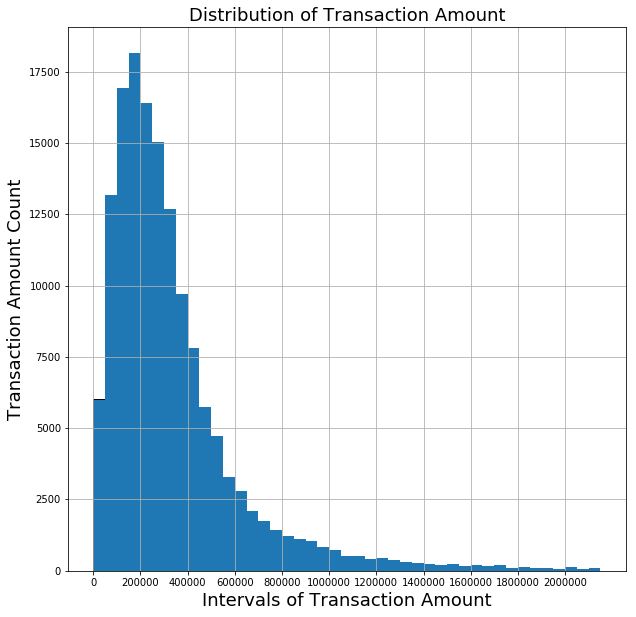

In [155]:
center = (nta_edge[:-1] + nta_edge[1:]) / 2
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(center, 
       nta_hist, 
       align='center', 
       width=np.diff(nta_edge),
       edgecolor='black')
ax.set_xticks(nta_edge[::4])

plt.xlabel('Intervals of Transaction Amount', fontsize=18)
plt.ylabel('Transaction Amount Count', fontsize=18)
plt.title('Distribution of Transaction Amount', fontsize=18)

plt.grid(True)

plt.show()

In [122]:
n, bins, patches = plt.hist(nta, 
                            bins=[x for x in range(0,1200000,50000)], 
                            normed=1, facecolor='blue', alpha=0.5)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
plt.grid(True)
plt.show()

/home/zeyu/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


KeyboardInterrupt: 

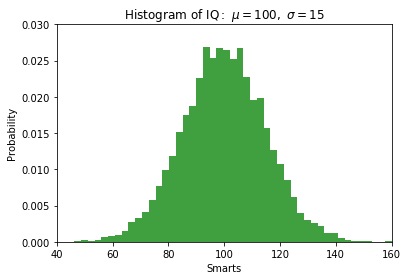

In [121]:

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])

plt.show()